In [151]:
import pandas as pd
#let's supress warnings for ease of read
import warnings
warnings.filterwarnings('ignore')

#let's first read the dataset that has the average age of firearm possessors in each state
tmp_df = pd.read_excel('/Users/sedacavdaroglu/Desktop/firearms/possessorage_by_state_cy2016.xlsx',skiprows=3,\
                 encoding="ISO-8859-1")
#let's get rid of the footer
df = tmp_df[:-9]

In [152]:
df

,State/Territory,17 & Under,18 to 21,22 to 24,25 to 30,31 to 40,41 to 50,Over 50,Average Age
0,ALABAMA,79.0,406.0,394.0,725.0,693.0,359.0,381.0,34.0
1,ALASKA,12.0,60.0,87.0,146.0,209.0,179.0,89.0,36.0
2,ARIZONA,104.0,485.0,510.0,770.0,876.0,637.0,787.0,37.0
3,ARKANSAS,33.0,106.0,76.0,165.0,197.0,465.0,44.0,37.0
4,CALIFORNIA,740.0,2817.0,2607.0,5194.0,6667.0,3820.0,5532.0,37.0
5,COLORADO,107.0,276.0,277.0,632.0,787.0,306.0,568.0,36.0
6,CONNECTICUT,8.0,72.0,56.0,92.0,111.0,59.0,75.0,35.0
7,DELAWARE,54.0,148.0,109.0,191.0,168.0,86.0,107.0,32.0
8,DISTRICT OF COLUMBIA,94.0,274.0,215.0,314.0,239.0,62.0,95.0,29.0
9,FLORIDA,583.0,1510.0,1325.0,2487.0,2517.0,1499.0,2174.0,36.0


The data looks fine. We can start exploring the dataset by finding the total number of arms by age group.

In [153]:
df.iloc[:,1:-2].sum().sort_values(ascending=False)

31 to 40      42168.0
25 to 30      37816.0
18 to 21      23601.0
41 to 50      23120.0
22 to 24      22127.0
17 & Under     7061.0
dtype: float64

Let's add the total number of possers as a new columns and put this on a box plot to visualize the total number of arms by age group.

In [154]:
df['total']=df.iloc[:,2:-1].sum(axis=1)

Let's find the top 5 states by the total number of firearm possesors.

In [155]:
df.sort_values(by='total',ascending=False).head(5)

,State/Territory,17 & Under,18 to 21,22 to 24,25 to 30,31 to 40,41 to 50,Over 50,Average Age,total
4,CALIFORNIA,740.0,2817.0,2607.0,5194.0,6667.0,3820.0,5532.0,37.0,26637.0
45,TEXAS,341.0,1664.0,1563.0,3062.0,3810.0,1855.0,1744.0,35.0,13698.0
9,FLORIDA,583.0,1510.0,1325.0,2487.0,2517.0,1499.0,2174.0,36.0,11512.0
10,GEORGIA,428.0,1205.0,1187.0,2048.0,1872.0,858.0,974.0,33.0,8144.0
34,NORTH CAROLINA,280.0,1190.0,1187.0,1679.0,1654.0,968.0,1148.0,34.0,7826.0


Populating the interactive namespace from numpy and matplotlib


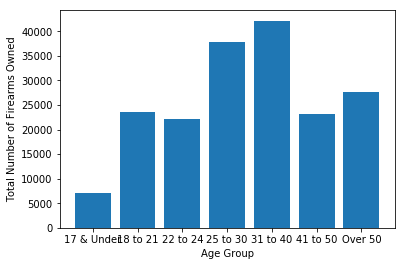

In [156]:
import matplotlib.pyplot as plt
%pylab inline



my_fig = plt.figure()
ax = my_fig.add_subplot(111)

plt1=ax.bar(range(7),df.iloc[:,1:-2].sum(),align='center')
ax.set_xticklabels(df.keys()[0:-2])
ax.set_xlabel('Age Group')
ax.set_ylabel('Total Number of Firearms Owned')

In [157]:
import plotly
plotly.tools.set_credentials_file(username='seda.cavdaroglu', api_key='SLd7k2PXlwXjohX7fDj9')

The state names are given in full format. Let's convert them into abbraviations to be able to us them in a map.

In [158]:
import us

states = us.states.mapping('abbr', 'name')

#this function converts a given state name into the abbreviation that we can later use for mapping
def state_to_abbrev(state,dict):
    for key in dict.keys():
              if dict[key] == state:
                return key

#convert all state names to abbreviations
state_abbrev=[]
for state in df['State/Territory']:
    state_abbrev.append(state_to_abbrev(str(us.states.lookup(state)),states))

df['state_abbrev']=state_abbrev

Let's check if our conversion from state names to state abbreviations worked.

In [159]:
df['state_abbrev']

0       AL
1       AK
2       AZ
3       AR
4       CA
5       CO
6       CT
7       DE
8       DC
9       FL
10      GA
11    None
12      HI
13      ID
14      IL
15      IN
16      IA
17      KS
18      KY
19      LA
20      ME
21      MD
22      MA
23      MI
24      MN
25      MS
26      MO
27      MT
28      NE
29      NV
30      NH
31      NJ
32      NM
33      NY
34      NC
35      ND
36      OH
37      OK
38      OR
39      PA
40      PR
41      RI
42      SC
43      SD
44      TN
45      TX
46    None
47      UT
48      VT
49      VA
50      WA
51      WV
52      WI
53      WY
Name: state_abbrev, dtype: object

It looks like we had a problem with 11 and 46. Let's see which states are these.

In [160]:
print(df['State/Territory'].iloc[11])
print(df['State/Territory'].iloc[46])

GUAM & NORTHERN MARIANA ISLANDS
US VIRGIN ISLANDS


It looks like GUAM & NOTHERN MARIANA ISLANDS represent  information from both states. That is going to be hard to tear them apart. Let's just assume that all the data comes from Guam insted for simplicity. For US Virgin Islands, the 'us' package needs 'Virgin Islands' insted. So let's change GUAM & NOTHERN MARIANA ISLANDS into Guam and US Virgin Islands into Virgin Islands.

In [161]:
df.set_value(df[df['State/Territory']=='GUAM & NORTHERN MARIANA ISLANDS'].index,'State/Territory','GUAM')
df.set_value(df[df['State/Territory']=='US VIRGIN ISLANDS'].index,'State/Territory','VIRGIN ISLANDS')

,State/Territory,17 & Under,18 to 21,22 to 24,25 to 30,31 to 40,41 to 50,Over 50,Average Age,total,state_abbrev
0,ALABAMA,79.0,406.0,394.0,725.0,693.0,359.0,381.0,34.0,2958.0,AL
1,ALASKA,12.0,60.0,87.0,146.0,209.0,179.0,89.0,36.0,770.0,AK
2,ARIZONA,104.0,485.0,510.0,770.0,876.0,637.0,787.0,37.0,4065.0,AZ
3,ARKANSAS,33.0,106.0,76.0,165.0,197.0,465.0,44.0,37.0,1053.0,AR
4,CALIFORNIA,740.0,2817.0,2607.0,5194.0,6667.0,3820.0,5532.0,37.0,26637.0,CA
5,COLORADO,107.0,276.0,277.0,632.0,787.0,306.0,568.0,36.0,2846.0,CO
6,CONNECTICUT,8.0,72.0,56.0,92.0,111.0,59.0,75.0,35.0,465.0,CT
7,DELAWARE,54.0,148.0,109.0,191.0,168.0,86.0,107.0,32.0,809.0,DE
8,DISTRICT OF COLUMBIA,94.0,274.0,215.0,314.0,239.0,62.0,95.0,29.0,1199.0,DC
9,FLORIDA,583.0,1510.0,1325.0,2487.0,2517.0,1499.0,2174.0,36.0,11512.0,FL


Let's do the conversion of state names to state codes again.

In [162]:
#convert all state names to abbreviations
state_abbrev=[]
for state in df['State/Territory']:
    state_abbrev.append(state_to_abbrev(str(us.states.lookup(state)),states))

df['state_abbrev']=state_abbrev
df

,State/Territory,17 & Under,18 to 21,22 to 24,25 to 30,31 to 40,41 to 50,Over 50,Average Age,total,state_abbrev
0,ALABAMA,79.0,406.0,394.0,725.0,693.0,359.0,381.0,34.0,2958.0,AL
1,ALASKA,12.0,60.0,87.0,146.0,209.0,179.0,89.0,36.0,770.0,AK
2,ARIZONA,104.0,485.0,510.0,770.0,876.0,637.0,787.0,37.0,4065.0,AZ
3,ARKANSAS,33.0,106.0,76.0,165.0,197.0,465.0,44.0,37.0,1053.0,AR
4,CALIFORNIA,740.0,2817.0,2607.0,5194.0,6667.0,3820.0,5532.0,37.0,26637.0,CA
5,COLORADO,107.0,276.0,277.0,632.0,787.0,306.0,568.0,36.0,2846.0,CO
6,CONNECTICUT,8.0,72.0,56.0,92.0,111.0,59.0,75.0,35.0,465.0,CT
7,DELAWARE,54.0,148.0,109.0,191.0,168.0,86.0,107.0,32.0,809.0,DE
8,DISTRICT OF COLUMBIA,94.0,274.0,215.0,314.0,239.0,62.0,95.0,29.0,1199.0,DC
9,FLORIDA,583.0,1510.0,1325.0,2487.0,2517.0,1499.0,2174.0,36.0,11512.0,FL


In [166]:
import plotly.plotly as py
import pandas as pd

for col in df.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df['text'] = df['State/Territory'] + '<br>' +\
    '17 & Under '+df['17 & Under']+' 18 to 21 '+df['18 to 21']+'<br>'+\
    '22 to 24 '+df['22 to 24']+' 25 to 30 ' + df['25 to 30']+'<br>'+\
    '31 to 40 '+df['31 to 40']+' 41 to 50 '+df['41 to 50']+'<br>'+\
    'Over 50 '+df['Over 50']+' Average Age'+df['Average Age']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['state_abbrev'],
        z = df['total'].astype(float),
        locationmode = 'USA-states',
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Number of Firearms")
        ) ]

layout = dict(
        title = 'Number of Firearms by State<br>(Hover to See the Age Breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = False,
            lakecolor = 'rgb(255,255,255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

Let's create another map that represents the total number of firearm possesors under age 17.

In [168]:
df['text'] = df['State/Territory'] + '<br>' +\
    '17 & Under '+df['17 & Under']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['state_abbrev'],
        z = df['17 & Under'].astype(float),
        locationmode = 'USA-states',
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Number of Firearms")
        ) ]

layout = dict(
        title = 'Number of Firearms Possed by Underage Citizens by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = False,
            lakecolor = 'rgb(255,255,255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )